#### Overview

Part 1: Basic text analysis

Part 2: Cleaning and normalization

Ideas for complex/advanced applications

### Part 1: Basic Text Analysis 

NLTK (Natural Language Toolkit): 

A python library with functions specifically designed to analyze natural (not-computer) language.

NLTK needs to be imported in any python script that uses it


In [11]:
import nltk
from urllib.request import urlopen


NLTK comes with two built-in texts, *Moby Dick* and *Sense and Sensibility.* Note the assumptions about how NLTK will be used: novels, long, canonical...

#### **NLTK functions: Concordance()**

- Called on a Text object and takes a string (a sequence of characters) as an argument

- text_variable.condordance(string_arg) 

- Calling condordance("word") returns the words that surround “word” in different sentences, helping us to get a glimpse of the contexts in which the word shows up. For example:

In [17]:
my_url = "https://raw.githubusercontent.com/ucla/ca-dhri/main/Day2/Liberator91901.txt"

file = urlopen(my_url)
liberator_raw = file.read()
liberator_txt = liberator_raw.decode()
txt_tokens = nltk.word_tokenize(liberator_txt)
liberator = nltk.Text(txt_tokens)

#let's make sure we created a text object
liberator

<Text: The Liberator Our martyred president , William McKinley...>

In [57]:
#call concordance on the word "law"
liberator.concordance("white")

Displaying 25 of 32 matches:
l. , September , 1901 . No . 2 . The white press sees the folly of encouraging 
the mob have endangered the lives of white men changed their tune Lynch law app
recent instance of the lynching of a white man . That such acts disgrace our na
se they were negroes . Had they been white they would have been duly convicted 
gro crime can never be suppressed by white men alone . The respectable negro el
s are lynched for crimes , for which white men would he tried . S. F. Chronicle
contempt or defiance of law . If two white men had to be killed to stop that mo
anarchy before it crushes them . The white press is already trying to ignore th
 not confine itself to the black and white races of the south , but soon found 
 place in the breast of the southern white man against the so- called 'Yankee .
ith in every avenue of industry that white people will allow him to enter . In 
ncreases . For every negro lynched a white man kills a white woman . Nicoll 's 
ry negro ly



#### **NLTK functions: Similar()**

-text.similar(string_arg)

-Like concordance, similar will find the contexts of the string variable it is given, but it can also compare the content of these contexts to all other words, looking for words that are used in similar contexts to the given argument

In [58]:
liberator.similar("white")

negro the honest good guilty daily degraded great educated hellish
northern


#### **NLTK functions: dispersion plot**

-text.dispersion_plot(list_arg)

-Takes a list of strings as input (not a single string!) and outputs a graph of the instances where each word appears. If you want to make a plot for one string, pass the function a one-object list [“example”]

-Note: dispersion_plot() is helpful for seeing how language changes over time or over narrative arcs. It might be more useful on a large collection of newspapers over time than on a single newspaper.


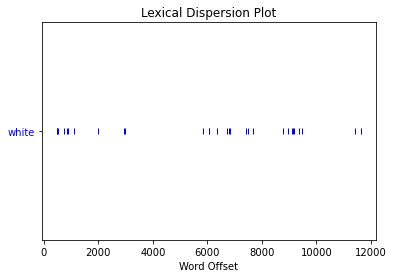

In [59]:
liberator.dispersion_plot(["white"])

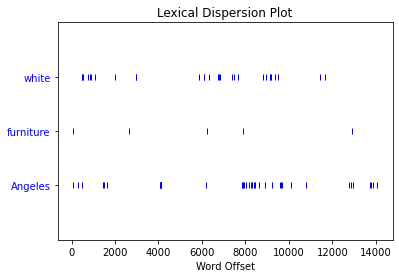

In [60]:
liberator.dispersion_plot(["white","furniture","Angeles"])

#### **NLTK functions: count()**

-Takes a word as an argument and returns a count of each instance of that word in a text. 

-It is case sensitive (we will address cases in data cleaning)

In [61]:
liberator.count("White")

3

In [62]:
liberator.count("white")

29

### Practice in Breakout Rooms

Can you think of how we could generate a concordance that would allow us to extract addresses from the text? What might we do with that information?

#### **Python operations on NLTK objects: len(), set()**

So far, we have been using the built-in NLTK corpus to analyze our text object. We can also use regular python expressions on it:

**len(text_object)** returns the length of the nltk object, that is, the number of words in the text. In a pre-cleaning text, this will include punctuation and metadata. 

**set(text_object)** creates a set (a list without duplicates) of all the unique words 

**len(set(text_object)** returns — you guessed it — the length of the set of unique words, ie, the number of unique words in the text.

In [63]:
len(liberator)

14373

In [65]:
set(liberator)
sorted(set(liberator))[:30]

['!',
 '$',
 '&',
 "'",
 "'It",
 "'Yankee",
 "'ll",
 "'re",
 "'s",
 "'ve",
 '(',
 ')',
 ',',
 '-the',
 '.',
 '1',
 '1,000',
 '1.00',
 '1.50',
 '1.69',
 '1/2',
 '10',
 '10,000',
 '10.00',
 '100',
 '105',
 '11',
 '111',
 '112',
 '113']

In [66]:
len(set(liberator))

3424

### Part 2: Cleaning and Normalizing Data

#### **Removing capitalization and punctuation**

Type vs. token: 
- angeles vs. Angeles vs. ANGELES are distinct types
    
- A token is an instance of a type

- nltk.count(“angeles”) counts the number of tokens of that type

If the distinction between cases isn't important in your analysis, making all values of a text lowercase can be useful.

So we'll start normalizing the text by making all words lower case

In [67]:
liberator_lowercase = [word.lower() for word in liberator] 

In [68]:
liberator_lowercase.count("angeles")

38

#### **Remove all punctuation**

Lets run this: 

In [31]:
liberator_lowercase_textonly = [word.lower() for word in liberator if word.isalpha()]

In [ ]:
#What did we just do, though?
#liberator_lowercase_textonly = [word.lower() for word in liberator if word.isalpha()] is shorthand for this function

liberator_lowercase_textonly = []				#define an empty list called liberator_lowercase_only

for w in liberator:					        #For each word ("w") in our existing text object 

	if w.isalpha():				        #if the word (“w”) is letters (not punctuation)
        
		liberator_lowercase_textonly.append(w.lower())  	#make it lowercase and add to our new list

        #if the word is not alpha, the for loop will move on to the next word 


TIP: be smart about your variable names 

#### **Removing stop words**

- ("the," "an," "a," etc.)


In [35]:
#a predefined list of stopwords, how nice!
nltk.download('stopwords')
from nltk.corpus import stopwords

#note, stopwords' type isn't a List, it's a WordListCorpusReader
print(type(stopwords))

#if we want a "real" list, we need to call the words attribute
print(type(stopwords.words()))
      
#here's what we have:
print(stopwords.words('english'))

<class 'nltk.corpus.reader.wordlist.WordListCorpusReader'>
<class 'list'>
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
#Get rid of stopwords in our text

#make sure you import stopwords somewhere in the script before you call it
liberator_sans_stops = []
stops = stopwords.words('english')

#define a new list
for word in liberator_lowercase_textonly:				#for each word in our cleaner list,
    if word not in stops:	                        #if that word isn’t in the list of stopwords,
        liberator_sans_stops.append(word)		        #add it to our new list


In [40]:
#did it work?
liberator_sans_stops.count("angeles")

38

In [41]:
liberator_sans_stops.count("of")

0

In [42]:
liberator_sans_stops.count("after")

0

#### **Lemmatizing words**

- Lemmatization shrinks words to their grammatical root
    - example, cats ⭢ cat and walked ⭢ walk
  
- This gets complicated in the case of men ⭢ man and sang ⭢ sing 

- Lemmatization looks up a word in a reference dictionary and finds the appropriate root (though this still is not entirely accurate and takes a long time, since each word must be looked up in a reference)

- NLTK comes with pre-built stemmers and lemmatizers. 

In [51]:
from nltk.stem import WordNetLemmatizer	

#create an instance of it for our function
wordnet_lemmatizer = WordNetLemmatizer()	

print(wordnet_lemmatizer.lemmatize("children"))

print(wordnet_lemmatizer.lemmatize("better"))

#for a word like “better,” need to specify grammatical function
print(wordnet_lemmatizer.lemmatize("better", pos='a'))
print(wordnet_lemmatizer.lemmatize("better", pos='n'))

#Parts of Speech
#ADJ, ADJ_SAT, ADV, NOUN, VERB = "a", "s", "r", "n", "v"

liberator_lemma = []
for word in liberator_sans_stops:
    word_lem = wordnet_lemmatizer.lemmatize(word)
    liberator_lemma.append(word_lem)   

child
better
good
better


### Part 3: Basic text analysis with our clean text

Because we've lemmatized our text, the results of functions like concordance, similar, and count will change. 

In [69]:
#we have to make our clean text an NLTK object to use the functions
liberator_clean = nltk.Text(liberator_lemma)

liberator_clean.concordance('law')

Displaying 25 of 32 matches:
red life white men changed tune lynch law appears increase country negro race s
 swift certain punishment solemn form law effective deterrent crime death hand 
tect conflict race black stand regard law justice negro crime never suppressed 
others yet caught guilty man punished law uncertainty law impelled mob certaint
t guilty man punished law uncertainty law impelled mob certainty law would sing
ncertainty law impelled mob certainty law would singled guilty wretch punished 
 conceivable motive contempt defiance law two white men killed stop mob save da
orth saving already forfeited majesty law worth saving cost fresno republican m
ravity regarded one worst known ethic law ascribed cause situation must apparen
parent every unbiased observer laxity law lynchers south considerable influence
ng duty brings upon head violent hand law hatred mankind mob roam thousand kill
artless brutal become popular respect law cease duty virtue talk anarchist ensu
lamity reas

In [ ]:
liberator_clean.concordance("children")

In [ ]:
liberator_clean.concordance("child")

In [ ]:
liberator_clean.concordance("anarchist")

In [ ]:
liberator_clean.concordance("lawless")

In [ ]:
liberator_clean.similar("good")

In [ ]:
liberator_clean.similar("child")

In [ ]:
liberator_clean.dispersion_plot(["law","america","anarchist","assassin",])

In [ ]:
liberator.dispersion_plot(["law","America","anarchist","assassin",])